# 3. Classification

---

### Setup

In [1]:
import sys
sys.path.insert(1, '../../utils')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ds_functions as ds
from sklearn.model_selection import StratifiedKFold

data: pd.DataFrame = pd.read_csv('prepared_zs_b_gs.csv', sep=';')
data

,"sum(time,serum_creatinine)","diff(ejection_fraction,age)","diff(serum_sodium,platelets)","diff(time,serum_creatinine)","prod(platelets,ejection_fraction)","prod(serum_creatinine,creatinine_phosphokinase)","prod(time,platelets)",serum_creatinine,time,DEATH_EVENT
0,0.674930,-2.746305,-1.991048,-4.042397,-0.212102,2.072487,-0.229548,2.358663,-1.683733,True
1,-1.120323,-1.907335,-0.717100,-2.168618,2.179469,-0.358849,2.303733,0.524147,-1.644471,True
2,0.714193,-0.648882,0.672764,-4.003134,1.064950,-1.910820,1.125669,2.358663,-1.644471,True
3,1.338785,-2.293108,-0.554090,-4.601552,-0.120663,-3.087800,1.262796,2.970169,-1.631383,True
4,-1.386814,-3.174217,1.911502,-1.823603,3.815123,-0.071214,3.087225,0.218395,-1.605208,True
...,...,...,...,...,...,...,...,...,...,...
321,1.386810,-2.294972,-0.595582,-2.902463,0.081458,1.884428,0.156121,2.144637,-0.757827,True
322,0.056808,-1.956917,-0.334150,-0.667602,-0.078572,0.056464,-0.018054,0.362205,-0.305397,True
323,0.814059,-1.057900,-0.104152,-2.532363,0.379514,-1.135267,0.318305,1.673211,-0.859152,True
324,-2.130500,-1.345682,0.721411,-0.960505,0.048310,0.196245,0.063941,-0.584998,-1.545503,True


## 3.0. Training Models

---

### Training Models

---

#### StratifiedKFold function
After loading the data, in data dataframe, we need to separate the target variable which is the DEATH_EVENT from the rest of the data, since it plays a different role in the training procedure. Through the application of the pop method, we get the class variable, and simultaneously removing it from the dataframe. So, y will keep the ndarray with the target variable for each record and X the ndarray containing the records themselves

In [2]:
target = 'DEATH_EVENT'
positive = True
negative = False
values = {'Original': [len(data[data[target] == positive]), len(data[data[target] == negative])]}

y: np.ndarray = data.pop(target).values
X: np.ndarray = data.values
labels: np.ndarray = pd.unique(y)

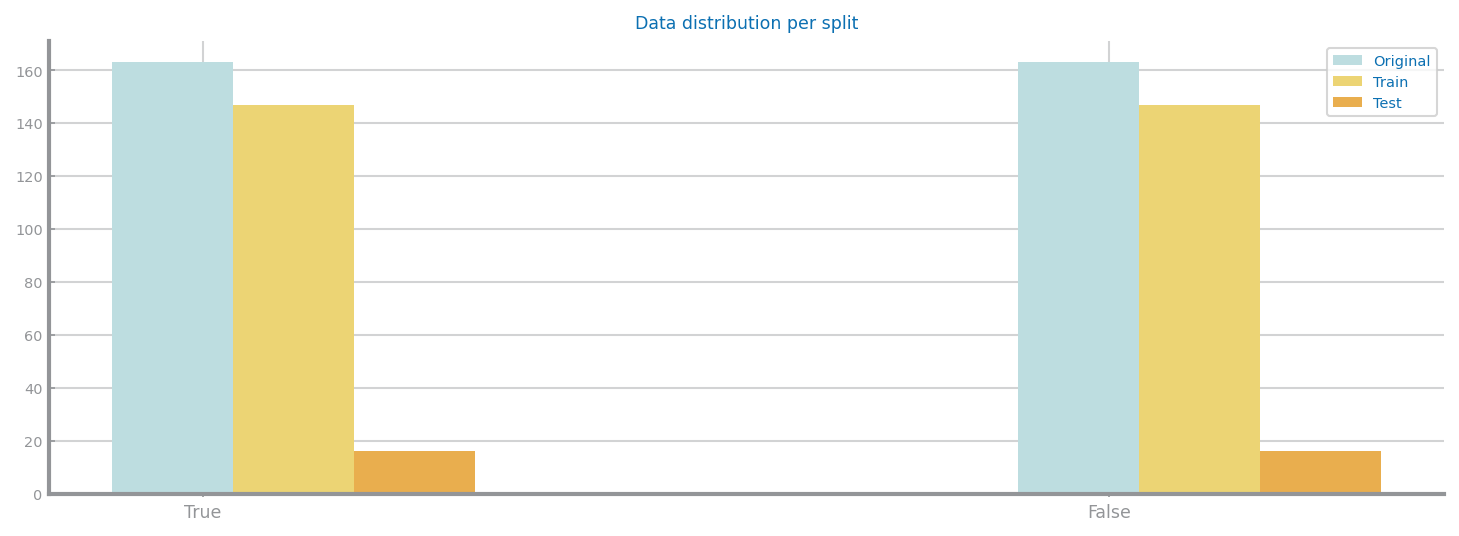

In [3]:
np.random.seed(1)
skf = StratifiedKFold(n_splits=10, shuffle=True)
skf.get_n_splits(X, y)

splits=[]

for train_index, test_index in skf.split(X, y):
    splits.append({'X_train': X[train_index], 'X_test': X[test_index],
                  'y_train': y[train_index], 'y_test': y[test_index]})

values['Train'] = [len(np.delete(y[train_index], np.argwhere(y[train_index]==negative))), len(np.delete(y[train_index], np.argwhere(y[train_index]==positive)))]
values['Test'] = [len(np.delete(y[test_index], np.argwhere(y[test_index]==negative))), len(np.delete(y[test_index], np.argwhere(y[test_index]==positive)))]

plt.figure(figsize=(12,4))
ds.multiple_bar_chart([positive, negative], values, title='Data distribution per split', showXTickLabels=True)
plt.show()

We have just plotted the chart of one split because the splits have identical distribution which will make the bar charts equal.

## 3.2. KNN

---

### No balancing

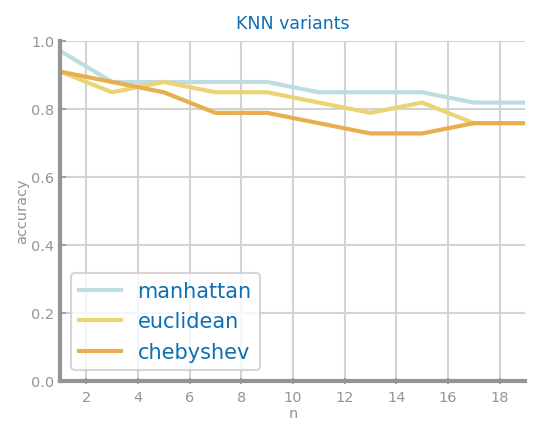

Best accuracy: 0.9696969696969697
Best results with 1 neighbors and manhattan


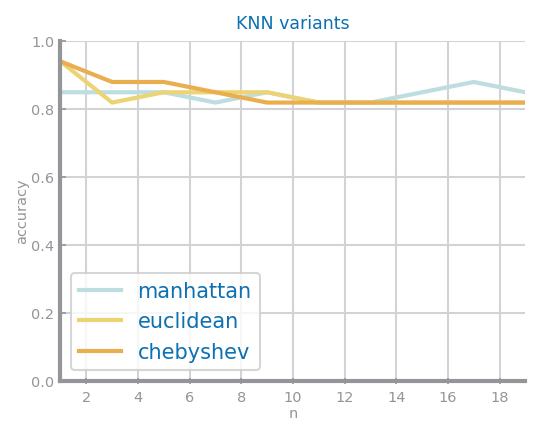

Best accuracy: 0.9393939393939394
Best results with 1 neighbors and euclidean


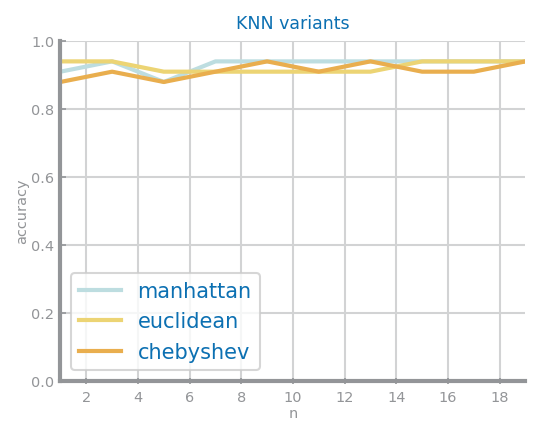

Best accuracy: 0.9393939393939394
Best results with 3 neighbors and manhattan


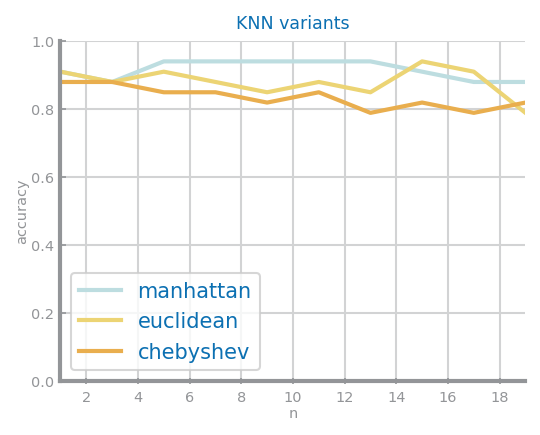

Best accuracy: 0.9393939393939394
Best results with 5 neighbors and manhattan


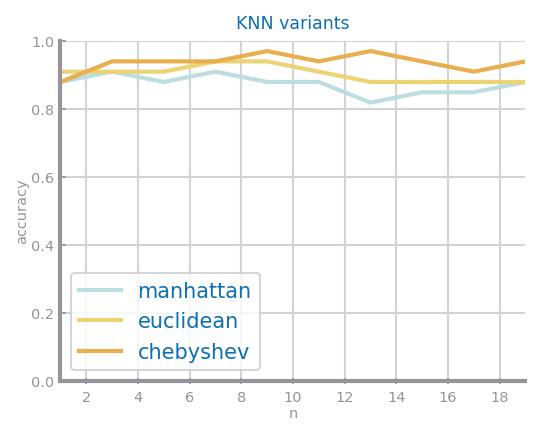

Best accuracy: 0.9696969696969697
Best results with 9 neighbors and chebyshev


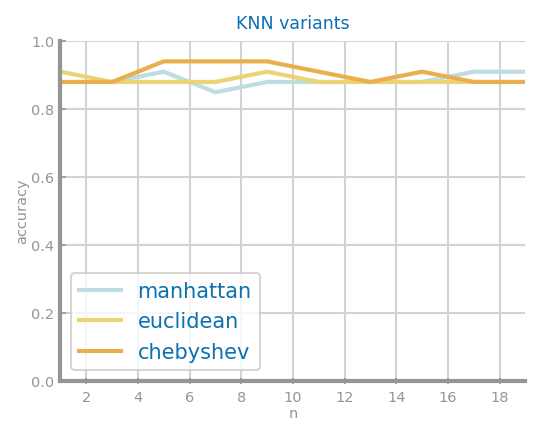

Best accuracy: 0.9393939393939394
Best results with 5 neighbors and chebyshev


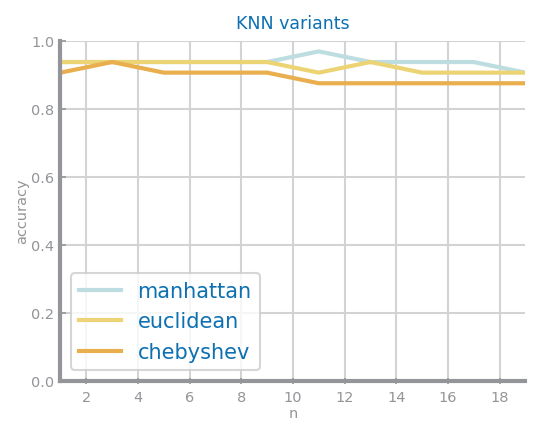

Best accuracy: 0.96875
Best results with 11 neighbors and manhattan


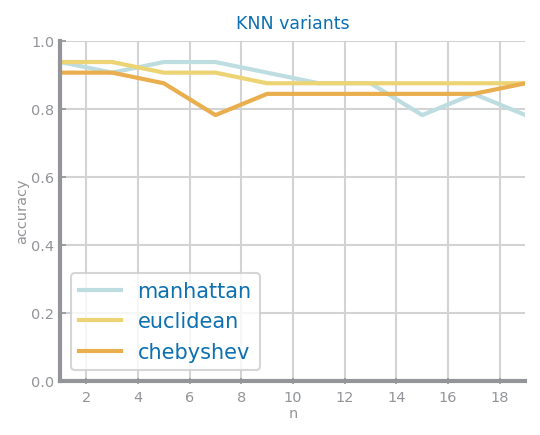

Best accuracy: 0.9375
Best results with 1 neighbors and manhattan


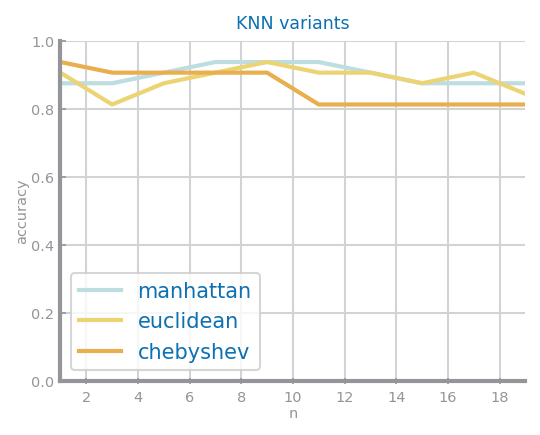

Best accuracy: 0.9375
Best results with 7 neighbors and manhattan


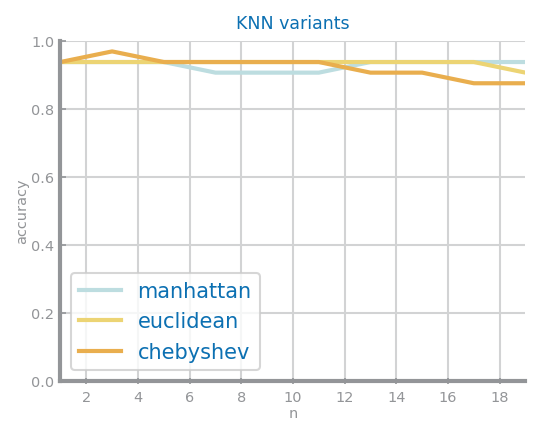

Best accuracy: 0.96875
Best results with 3 neighbors and chebyshev


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.neighbors import KNeighborsClassifier
import ds_functions as ds

split_best = []

for spli in range(len(splits)):
    split = splits[spli]
    nvalues = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]
    dist = ['manhattan', 'euclidean', 'chebyshev']
    values = {}
    best = (0, '')
    last_best = 0
    for d in dist:
        yvalues = []
        for n in nvalues:
            knn = KNeighborsClassifier(n_neighbors=n, metric=d)
            knn.fit(split['X_train'], split['y_train'])
            prdY = knn.predict(split['X_test'])
            yvalues.append(metrics.accuracy_score(split['y_test'], prdY))
            if yvalues[-1] > last_best:
                best = (n, d)
                last_best = yvalues[-1]
        values[d] = yvalues
    split_best.append(best)
    
    plt.figure()
    ds.multiple_line_chart(nvalues, values, title='KNN variants', xlabel='n', ylabel='accuracy', percentage=True)
    plt.show()
    print("Best accuracy:", last_best)
    print('Best results with %d neighbors and %s'%(best[0], best[1]))

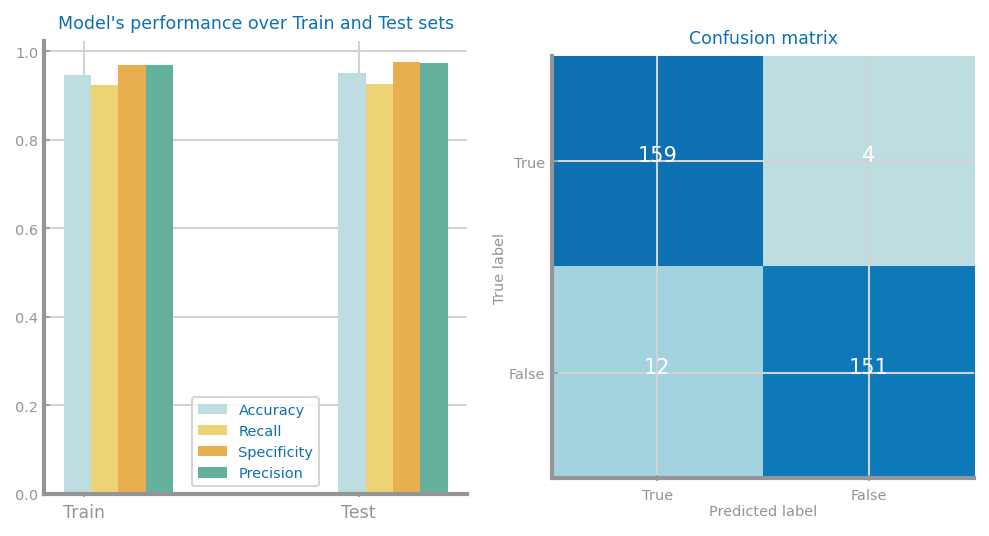

In [5]:
totalYTrn = np.array(())
totalPrd_trn = np.array(())
totalYTst = np.array(())
totalPrd_tst = np.array(())

for spli in range(len(splits)):
    split = splits[spli]
    best = split_best[spli]
    
    clf = KNeighborsClassifier(n_neighbors=best[0], metric=best[1])
    clf.fit(split['X_train'], split['y_train'])
    
    prd_trn = clf.predict(split['X_train'])
    totalYTrn = np.concatenate((totalYTrn, split['y_train']))
    totalPrd_trn = np.concatenate((totalPrd_trn, prd_trn))
    
    prd_tst = clf.predict(split['X_test'])
    totalYTst = np.concatenate((totalYTst, split['y_test']))
    totalPrd_tst = np.concatenate((totalPrd_tst, prd_tst))
    
ds.plot_evaluation_results(labels, totalYTrn, totalPrd_trn, totalYTst, totalPrd_tst, showXTickLabels=True)

In [6]:
print(metrics.accuracy_score(totalYTst, totalPrd_tst))

0.950920245398773


### Summary

---

***How do models improve with the increase of neighbors?***

The impact of the number of neighbors in the in the results seems to depend on the split between train and test records. We could not reach any conclusion.

***How does performance changes with different distance measures?***

The Chebyshev measure doens't seem very appropriate for this dataset. It is almost always worse or similar to the other 2 in terms of performance (accuracy).
Manhattan and Euclidean measures are similar.

***What is the best parametrisation (number of neighbors and distance measure)?***

The best results (~0.833 accuracy) were shared between 3 of the splits. The number of neighbors was different on each of the parametrisations with the manhattan measure. With the euclidean measure, having 13 as the number of neighbours seemed to yield best results.

***Is the accuracy achieved good enough?***

The accuracy is better than the one of the classifier that considers every record is negative. However, this doesn't mean the classifier is good enough. We still consider it is not very good.

***What is the largest kind of errors?***

False negative.

***Is it possible to identify overfitting?***

In some of the splits, the model seems more adequate for the training set than for the test set. In others, it's the other way around. But the differences were not very significant, so we don't think it is possible to identify overfitting.